# Buzzard analysis

In this notebook we will hopefully fit the data from Buzzard.

In [1]:
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", size=18, family="serif")
plt.rc("errorbar", capsize=2)

In [3]:
import args_assembler
import lensing_models
import probability_distributions as PDFs

In [4]:
model_choices = []#"has_RM_selection"]
analysis_name = "Buzzard_samemass"
z_index = 0
lambda_index = 3
args = args_assembler.get_args_dictionary(analysis_name, z_index, lambda_index, model_choices)

Running CLASS for P(k)
CLASS computation complete


In [5]:
def neg_lnpost(params, args):
    return -PDFs.lnposterior(params, args)

In [6]:
#A = args["A_matrix_prior_means"]
guess = np.array([13., 5.])#, A[0], A[1], A[2]])
result = op.minimize(neg_lnpost, guess , args=(args,))
print(result)

      fun: 314.3996423188467
 hess_inv: array([[ 2.24202202e-05, -1.68151652e-05],
       [-1.68151652e-05,  1.26121597e-05]])
      jac: array([1.90734863e-05, 3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 424
      nit: 10
     njev: 101
   status: 2
  success: False
        x: array([14.33477092,  5.94694067])


In [7]:
log10_M, c = result.x#, a2, a3, a4 = result.x
#A = np.array([a2, a3, a4])
parameter_dict = {"log10_M":log10_M, "M":10**log10_M, "c":c}#, "A_matrix":A}

output = lensing_models.get_lensing_profile(parameter_dict, args, True)

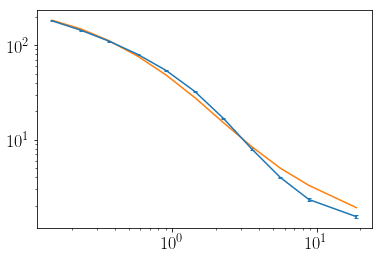

In [8]:
#Plot the data and the model
plt.errorbar(args["R_mid"], args["DeltaSigma_data"], args["DeltaSigma_unc"])
plt.plot(args["R_mid"], output["ave_DeltaSigma"])
plt.loglog();

In [9]:
model_choices = []#"has_RM_selection"]
analysis_name = "Buzzard_redMaPPer"
z_index = 0
lambda_index = 3
args2 = args_assembler.get_args_dictionary(analysis_name, z_index, lambda_index, model_choices)

Running CLASS for P(k)
CLASS computation complete


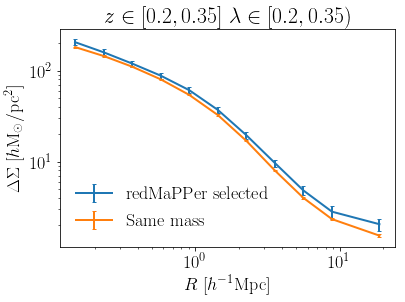

In [10]:
plt.errorbar(args2["R_mid"], args2["DeltaSigma_data"], args2["DeltaSigma_unc"], 
             lw=2, label="redMaPPer selected")
plt.errorbar(args["R_mid"], args["DeltaSigma_data"], args["DeltaSigma_unc"], 
             lw=2, label="Same mass")
plt.loglog()
title = r"$z\in[{0}]\ \lambda\in[{1})$".format(args["z_title"], args["lambda_title"])
plt.title(title)
plt.legend(frameon=False)
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\Delta\Sigma\ [h{\rm M_\odot}/{\rm pc^2}]$");
#plt.savefig("DeltaSigma_selections.png", dpi=300, bbox_inches="tight")